### ¿Que puerta elegir?

Supón que estás en un concurso, y se te ofrece escoger entre tres puertas: detrás de una de ellas hay un coche, y detrás de las otras, cabras. Escoges una puerta, digamos la nº1, y el presentador, que sabe lo que hay detrás de las puertas, abre otra, digamos la nº3, que contiene una cabra. Entonces te pregunta: "¿No prefieres escoger la nº2?". ¿Es mejor para ti cambiar tu elección?

### Monty Hall Codigo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Ejemplo situación 2 ¿Que puerta elegir? (el problema Monty Hall)
def elegir_puerta():
    """
    Función para elegir una puerta. Devuelve 1, 2, o 3 en forma aleatoria.
    """
    return np.random.randint(1,4)


class MontyHall:
    """
    Clase para modelar el problema de Monty Hall.
    """
    def __init__(self):
        """
        Crea la instancia del problema.
        """
        # Elige una puerta en forma aleatoria.
        self.puerta_ganadora = elegir_puerta()
        # variables para la puerta elegida y la puerta descartada
        self.puerta_elegida = None
        self.puerta_descartada = None

    def selecciona_puerta(self):
        """
        Selecciona la puerta del concursante en forma aleatoria.
        """
        self.puerta_elegida = elegir_puerta()

    def descarta_puerta(self):
        """
        Con este método el presentador descarta una de la puertas.
        """
        # elegir puerta en forma aleatoria .
        d = elegir_puerta()
        # Si es al puerta ganadora o la del concursante, volver a elegir.
        while d == self.puerta_ganadora or d == self.puerta_elegida:
            d = elegir_puerta()
        # Asignar el valor a puerta_descartada.
        self.puerta_descartada = d

    def cambiar_puerta(self):
        """
        Cambia la puerta del concursante una vez que se elimino una puerta.
        """
        # 1+2+3=6. Solo existe una puerta para elegir.
        self.puerta_elegida = 6 - self.puerta_elegida - self.puerta_descartada

    def gana_concursante(self):
        """
        Determina si el concursante gana.
        Devuelve True si gana, False si pierde.
        """
        return self.puerta_elegida == self.puerta_ganadora


    def jugar(self, cambiar=True):
        """
        Una vez que la clase se inicio, jugar el concurso.

        'cambiar' determina si el concursante cambia su elección.
        """
        # El concursante elige una puerta.
        self.selecciona_puerta()
        # El presentador elimina una puerta.
        self.descarta_puerta()
        # El concursante cambia su elección.
        if cambiar:
            self.cambiar_puerta()
        # Determinar si el concursante ha ganado.
        return self.gana_concursante()

In [ ]:
# Ahora, jugamos el concurso. primero nos vamos a quedar con nuestra elección
# inicial. Vamos a ejecutar el experimiento 10.000 veces.
gana, pierde = 0, 0
for i in range(10000):
    # Crear la instancia del problema.
    s2 = MontyHall()
    # ejecutar el concurso sin cambiar de puerta..
    if s2.jugar(cambiar=False):
        # si devuelve True significa que gana.
        gana += 1
    else:
        # si devuelve False significa que pierde.
        pierde += 1

# veamos la fecuencia de victorias del concursante.
porc_gana = 100.0 * gana / (gana + pierde)

print("\n10.000 concursos sin cambiar de puerta:")
print("  gana: {0:} concursos".format(gana))
print("  pierde: {0:} concursos".format(pierde))
print("  probabilidad: {0:.2f} procentaje de victorias".format(porc_gana))


10.000 concursos sin cambiar de puerta:
  gana: 3329 concursos
  pierde: 6671 concursos
  probabilidad: 33.29 procentaje de victorias


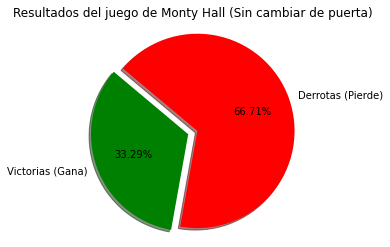

In [ ]:
# Crear el gráfico
labels = ['Victorias (Gana)', 'Derrotas (Pierde)']
sizes = [gana, pierde]
colors = ['green', 'red']
explode = (0.1, 0)  # Resaltar la primera rebanada

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio asegura que el círculo sea 'circular'.
plt.title('Resultados del juego de Monty Hall (Sin cambiar de puerta)')
plt.show()

In [ ]:
# Ahora, jugamos el concurso siempre cambiando la elección inicial
# Vamos a ejecutar el experimiento 10.000 veces.
gana, pierde = 0, 0
for i in range(10000):
    # Crear la instancia del problema.
    s2 = MontyHall()
    # ejecutar el concurso sin cambiar de puerta..
    if s2.jugar(cambiar=True):
        # si devuelve True significa que gana.
        gana += 1
    else:
        # si devuelve False significa que pierde.
        pierde += 1

# veamos la fecuencia de victorias del concursante.
porc_gana = 100.0 * gana / (gana + pierde)

print("\n10.000 concursos cambiando de puerta:")
print("  gana: {0:} concursos".format(gana))
print("  pierde: {0:} concursos".format(pierde))
print("  probabilidad: {0:.2f} procentaje de victorias".format(porc_gana))


10.000 concursos cambiando de puerta:
  gana: 6614 concursos
  pierde: 3386 concursos
  probabilidad: 66.14 procentaje de victorias


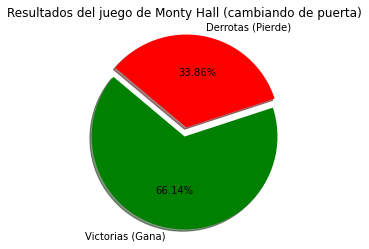

In [ ]:
# Crear el gráfico
labels = ['Victorias (Gana)', 'Derrotas (Pierde)']
sizes = [gana, pierde]
colors = ['green', 'red']
explode = (0.1, 0)  # Resaltar la primera rebanada

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio asegura que el círculo sea circular.
plt.title('Resultados del juego de Monty Hall (cambiando de puerta)')
plt.show()

## Ejercicios Morales de Probabilidad


## Ejercicio 1
Se tienen dos urnas, y cada una de ellas contiene un número diferente de bolas blancas y rojas:
* Primera urna, U1: 3 bolas blancas y 2 rojas
* Segunda urna, U2: 4 bolas blancas y 2 rojas


Se realiza el siguiente experimento aleatorio: Se tira una moneda al aire y si sale cara se elige una bola de la primera urna, y si sale cruz de la segunda.
* ¿Cuál es la probabilidad de que salga una bola blanca?.



Sean los eventos:
* B: Sacar una bola blanca
* U1: Elegir la primer urna
* U2: Elegir la segunda urna
* C: Sacar cara en la moneda
* X: Sacar cruz en la moneda

Sabemos que la proba de sacar cara o cruz al lanzar una moneda al aire es:
$$P(C) = \frac{1}{2} = P(X)$$

La proba de sacar una bola blanca habiendo elegido la primer urna es:
$$P(B|U1)=\frac{3}{5}$$
La proba de sacar una bola blanca habiendo elegido la segunda urna es:
$$P(B|U2)=\frac{4}{6}$$
Ahora, podemos usar el teorema de probabilidad total para obtener la probabilidad de sacar una bola blanca de las urnas dado el resultado de la moneda.
$$P(B) = P(C)P(B|U1) + P(X)P(B|U2)$$
$$P(B) = \frac{1}{2} \cdot \frac{3}{5} + \frac{1}{2}\cdot \frac{4}{6} = \frac{19}{30} \approx 63.33\%$$

In [ ]:
# Vamos a definir una función que nos indique si se obtuvo una bola blanca dado el resultado aleatorio de lanzar la moneda y sacar una bola de la urna correspondiente.
def lanzarMoneda():
    """
    Regresa 'C' para indicar que salió cara
    Regresa 'X' para indicar que salió cruz
    """
    # Escoje un número aleatorio entre 1 y 2
    resultado = np.random.randint(1, 3)

    if(resultado == 1):
        return 'C'
    else:
        return 'X'

def probaBolaBlanca():
    """
    Regresa verdadero si se sacó una bola blanca de alguna urna y falso en caso contrario.
    """
    urna1 = ['B', 'B', 'B', 'R', 'R']
    urna2 = ['B', 'B', 'B', 'B', 'R', 'R']
    moneda = lanzarMoneda()
    resultado = 'X'

    if(moneda == 'C'):
        resultado = np.random.choice(urna1)
    else:
        resultado = np.random.choice(urna2)

    if(resultado == 'B'):
        return True
    else:
        return False


# Ahora, vamos a realizar la repetición del experimento 10.000 veces.
blanca, roja = 0, 0
for i in range(10000):
    if probaBolaBlanca():
        # si devuelve True significa que salió bola blanca
        blanca += 1
    else:
        # si devuelve False significa que salió bola roja.
        roja += 1

# veamos la fecuencia de veces que sale la bola blanca.
porc_blanca = 100.0 * blanca / (blanca + roja)

print("\n10.000 experimentos realizados:")
print("  Bola blanca: {0:}".format(blanca))
print("  Bola roja: {0:}".format(roja))
print("  Probabilidad: {0:.2f} procentaje de veces que sale bola blanca".format(
    porc_blanca))



10.000 experimentos realizados:
  Bola blanca: 6276
  Bola roja: 3724
  Probabilidad: 62.76 procentaje de veces que sale bola blanca


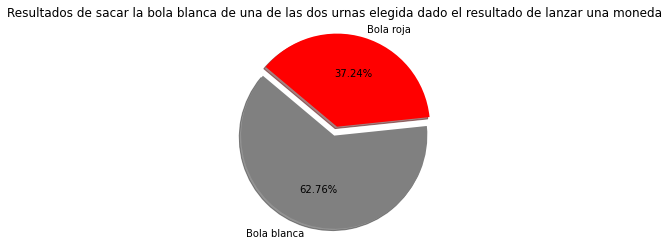

In [ ]:
# Vamos a graficar el resultado
labels = ['Bola blanca', 'Bola roja']
sizes = [blanca, roja]
colors = ['gray', 'red']
explode = (0.1, 0)  # Resaltar la primera rebanada

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio asegura que el círculo sea circular.
plt.title('Resultados de sacar la bola blanca de una de las dos urnas elegida dado el resultado de lanzar una moneda')
plt.show()


## Ejercicio 2

Una urna contiene 5 bolas numeradas 1,2,3,4 y 5.

* Calcular la probabilidad de que al sacar 2 bolas con reposición y que la suma de los puntos sea impar.

Notemos que hay dos casos donde una suma puede ser impar:
* Suma de dos números impares
* Suma de un número par y un impar

Entonces, veamos las probabilidades del problema acorde a esto.

Sumar dos números impares:
* Los números impares disponibles son: 1,3,5
* Hay 3 posibilidades para el primer número de la suma, y otras 3 para el segundo (por la reposición).
* Entonces el total de combinaciones son: 3 * 3 = 9

Suma de un número impar y otro par:
* Números pares disponibles: 2,4
* Números impares disponibles: 1,3,5
* Hay dos posibilidades para el primer número (par) y tres para el segundo (impar)
* Teniendo un total de combinaciones par e impar: 2 * 3 = 6

Tenemos entonces las probabilidades:
$$P(Suma Impar) = \frac{(\text{Combinaciones impares}  + \text{Combinaciones par e impar})}{\text{Total de combinaciones posibles}}$$
$$P(Suma Impar) = \frac{9 + 6}{5 * 5}$$
Tenemos que el total de combinaciones posibles es 5 * 5 porque tenemos 5 números de los cuales elegir cada vez por la reposición.
Entonces tenemos:
$$P(Suma Impar) = \frac{15}{25}$$
$$P(Suma Impar) = \frac{3}{5}$$
Así, la probabilidad de sacar 2 bolas con reposición y que la suma de los puntos sea impar es de $\frac{3}{5} = 0.6$


In [ ]:
def sacarBola():
    """
    Regresa el valor de la bola numerada.
    """
    urna = [1,2,3,4,5]
    return np.random.choice(urna)

def sacarBola2():
    """
    Regresa el valor de la bola numerada.
    """
    urna = [1,2,3,4,5]
    return np.random.choice(urna)


def sumaBolas():
    """
    Regresa la suma del valor de dos bolas numeradas sacadas de la urna.
    """
    return sacarBola() + sacarBola2()

def experimentoBolasImpares():
    """
    Regresa verdadero si al sacar dos bolas de la urna y su suma del valor que los valores que la enumeran es impar, falso en caso de se par.
    """
    if(sumaBolas() % 2 == 0):
        return False
    else:
        return True


# Realizamos el experimento 10.000 veces
impar, par = 0, 0
for i in range(10000):
    if experimentoBolasImpares():
        # si devuelve True significa que el resultado fue impar
        impar += 1
    else:
        # si devuelve False significa que el resultado fue par.
        par += 1

# veamos la fecuencia de veces que sale la bola blanca.
porc_impares = 100.0 * impar / (impar + par)

print("\n10.000 experimentos realizados:")
print("  Suma impar: {0:}".format(impar))
print("  Suma par: {0:}".format(par))
print("  Probabilidad: {0:2f} procentaje de veces que se obtuvo una suma impar de las bolas numeradas sacadas".format(
    porc_impares))



10.000 experimentos realizados:
  Suma impar: 4843
  Suma par: 5157
  Probabilidad: 48.430000 procentaje de veces que se obtuvo una suma impar de las bolas numeradas sacadas


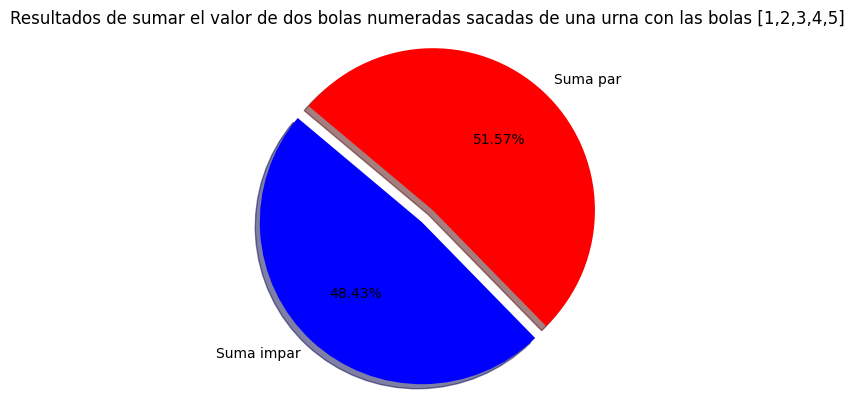

In [ ]:
# Vamos a graficar el resultado
labels = ['Suma impar', 'Suma par']
sizes = [impar, par]
colors = ['blue', 'red']
explode = (0.1, 0)  # Resaltar la primera rebanada

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio asegura que el círculo sea circular.
plt.title('Resultados de sumar el valor de dos bolas numeradas sacadas de una urna con las bolas [1,2,3,4,5]')
plt.show()


## Teoría de conjuntos

**Unión:** La unión de varios eventos simples crea un evento compuesto que ocurre si uno o más de los eventos ocurren. La unión de A y B se escribe $A\cup B$ y significa "Ya sea A o B, o ambos A y B".

**Intersección:** La intersección de dos o más eventos simples crea un evento compuesto que ocurre sólo si ocurren todos los eventos simples. La intersección de A y B se escribe $A\cap B$ y significa "A y B".

**Complemento:** El complemento de un evento significa todo en el espacio de muestreo que no es ese evento. El complemento del evento E se escribe como $E^{c}$.

**Conjuntos mutuamente excluyentes:** Si los eventos no pueden ocurrir juntos, son mutuamente excluyentes.

In [ ]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

ModuleNotFoundError: No module named 'matplotlib_venn'

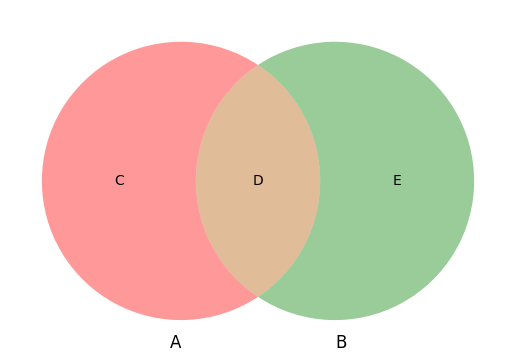

In [ ]:
diagram = venn2((10, 10, 5))
diagram.get_label_by_id("10").set_text("C")
diagram.get_label_by_id("11").set_text("D")
diagram.get_label_by_id("01").set_text("E")


## Operaciones con conjuntos

Para unión de conjuntos mutuamente excluyentes:

$$P(A\cup B) = p(A) + p(B)$$

Para conjuntos no mutuamente excluyentes:

$$P(A\cup B) = p(A) + p(B) - p(A\cap B)$$

Intersección de eventos independientes:

$$p(A\cap B) = p(A)*p(B)$$

**Probabilidad condicional:** la probabilidad de algún evento A, dado que otro evento B ha ocurrido.

Intersección de eventos no independientes:

$$p(A\cap B) = p(A)*p(B|A)$$





In [ ]:
## Definimos nuestro conjunto

a = {1, 2, 3}
b = {3, 4, 5}

### Operación de Unión (U)


In [ ]:
union = a.union(b)

print(union) # {1, 2, 3, 4, 5}

{1, 2, 3, 4, 5}


### Operación de Intersección (⋂)


In [ ]:
intersection = a.intersection(b)

print(intersection) # {3}

{3}


### Operación de Diferencia

In [ ]:
differenceAB = a.difference(b)
differenceBA = b.difference(a)

print(differenceAB) # {1, 2}
print(differenceBA) # {4, 5}

{1, 2}
{4, 5}


# Teorema de Bayes

$$P(B|A) = P(A|B)*\frac{P(B)}{P(A)}$$


## Matriz de Confusión


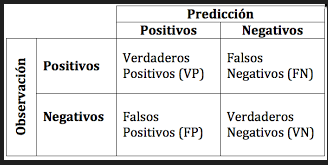

# Ejemplificando el Teorema de Bayes con diagnositcos médicos.
## ¿Qué tan probable es que realmente tengamos la enfermedad?.

En una población de 1000 individuos, supongamos que el 1% sufre COVID, y el resto está bien. Escogiendo un individuo al azar:
$$P(enfermo) = 0.01$$
$$P(sano) = 0.99$$

Supongamos que aplicando una prueba a una persona que no tiene COVID, hay una posibilidad del 1% de conseguir un falso positivo, esto es:
$$P(+|sano) = 0.01$$
$$P(-|sano) = 0.99$$

Supongamos que aplicando la prueba a una persona que tiene COVID, hay una posibilidad del 1% de un falso negativo, esto es:
$$P(-|enfermo) = 0.01$$
$$P(+|enfermo) = 0.99$$

La fracción de individuos en el grupo que están sanos y dan negativo (Bayes):
$$P(sano\cap -) = P(sano)*P(-|sano) = 0.99*0.99 = 0.9801$$

La fracción de individuos en el grupo que están enfermos y dan positivo:
$$P(enfermo\cap +) = P(enfermo)*P(+|enfermo) = 0.01*0.99 = 0.0099$$

La fracción de individuos en el grupo que dan falso positivo:
$$P(sano\cap +) = P(sano)*P(+|sano) = 0.01*0.99 = 0.0099$$

La fracción de individuos en el grupo que dan falso negativo:
$$P(enfermo\cap -) = P(enfermo)*P(-|enfermo) = 0.01*0.01 = 0.0001$$

### Mas Ejemplos de bayes
Hay 2 tarros de galletas:


*   El tarro 1 tiene 30 galletas de vainilla y 10 de chocolate
*   El tarro 2 tiene 20 galletas de vainilla y 20 de chocolate

Eliges al azar una galleta de un tarro elegido al azar. Es de vainilla.

* ¿Cuál es la probabilidad de que sea del tarro 1?



In [ ]:
"""
buscamos P(Tarro 1 | Vainilla).
"""
# Probabilidad de elegir entre el tarro 1 y el 2: a priori
p_Tarro1 = 1/2

# Vainilla / total de galletas: Likelihood

probabilidad_vanilla_dado_Tarro1 = 30/(30+10)

# total galletas de vainilla / total de galletas = evidencia
p_vanilla = (30+20) / (30+10 + 20+20)

# Bayes
probabilidad_Tarro1_dado_probabilidad_galleta_vanilla = (p_Tarro1 * probabilidad_vanilla_dado_Tarro1 ) / p_vanilla

print('P(Tarro 1 | Vainilla) = {}'.format(probabilidad_Tarro1_dado_probabilidad_galleta_vanilla))



P(Tarro 1 | Vainilla) = 0.6
